# Project Roadmap / Responsibility Breakdown




> ✅ Find/Propose Research Papers
  - [OWNER: **AnnaGarcia**]
      - ✅ An Information Retrieval Approach to Building
Datasets for Hate Speech Detection
      - 🪓 A Large Scale Search Dataset for Unbiased Learning to Rank
      - 🪓 NATURAL LANGUAGE DESCRIPTIONS OF
DEEP VISUAL FEATURES
      - 🪓 Dataset Distillation via Factorization
      - 🪓 A Combinatorial Perspective on Transfer Learning
  - [OWNER: **BrianLlinas**]

-------
Shared Folder: https://drive.google.com/drive/folders/1wamYeVVBSp4Zqc20EG-JqlR3ZY78Umc6?usp=sharing

> ✅ Create Presentation
  - ✅ [OWNER: **AnnaGarcia**] Slides 1-8, 13, 14
  - ✅ [OWNER: **BrianLlinas**] Slides 9-12

-----

> ✅ [Collecting Dataset](https://colab.research.google.com/drive/1Nv6I69-I8_Kg1LQQYTLjhETD-wsuL71f#scrollTo=IXUbg8pSm8MZ&line=1&uniqifier=1) [OWNER: **AnnaGarcia**]
  - Data from:
    1. https://www.kaggle.com/datasets/vkrahul/twitter-hate-speech/data
    2.  https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data
  - ✅ Collect tweets
       - 3,000 is for training and testing models
       - 1,000 is for 'building the dataset' Experiment
  - ✅ Clean the data
  - ✅ Export both dataset into a csv file. provide names here:
    - experiment_dataset.csv
    - train_test_dataset.csv
    * They are in our shared drive: `/content/drive/MyDrive/CS722-Project-Shared`

-----

> - [ ] Create 1st Algorithm (Pooling) [OWNER: **AnnaGarcia**]
    - [ ] Logistic Regression
    - [ ] Naive bayes
    - [ ] LSTM-based
    - [ ] Bi-LSTM model
    - [ ] BERT

> - [ ] Create 2nd Algorithm (ActiveLearning) [OWNER: **OWNERNAME**]

-----

> - [ ] Evaluation [OWNER: **OWNERNAME**]

----

> - [ ] Extra Credit Experiment [OWNER: **OWNERNAME**]
> - [ ] Evaluation [OWNER: **OWNERNAME**]

--------------------

 > - [ ] Research Paper (10 pages)

# Imports and Installations


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# @title Required Installs
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.2 MB/s eta 0:00:00


In [76]:
# @title Required Imports

import pandas as pd
import numpy as np
import re
import neattext as nt
import neattext.functions as nfx
import uuid
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Collecting Dataset

We will be using two dataset

1.Twitter hate speech:
 https://www.kaggle.com/datasets/vkrahul/twitter-hate-speech/data

 > Use the `train_E6oVIV.csv`: /content/drive/MyDrive/CS722-Project-Shared/train_E6oV3lV.csv

 > Class label: { `0: non-hate`, `1: hate` }

 > Most of the data for class 'hate' mostly contains offensive language or prevalence

 2. Hate Speech and Offensive Language Dataset :
 https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/data

> Class label: { `0: hate-speech`, `1: offensive language`, `2: neither` }

> We are able to capture the 'Coverage' part with this dataset. The tweets labeled '0' does not have curse-words but are considered hateful.





## 1. Twitter hate speech dataset



In [5]:
path1 = "/content/drive/MyDrive/CS722-Project-Shared/train_E6oV3lV.csv"
dataset1 = pd.read_csv(path1)
print(dataset1.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [6]:
dataset1['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
# Collect 1500 '1' and 1500 '0'

# Randomly split the dataset evenly for Training/Testing and The actual experiment


dataset_label_0 = dataset1[dataset1['label'] == 0]
dataset_label_1 = dataset1[dataset1['label'] == 1]

print(f"dataset_label_0 length: {len(dataset_label_0)}")
print(f"dataset_label_1 length: {len(dataset_label_1)}")

dataset_label_0 length: 29720
dataset_label_1 length: 2242


In [8]:
random_sample_label_0 = dataset_label_0.sample(n=1500,random_state=42)
random_sample_label_1 = dataset_label_1.sample(n=1500,random_state=42)

print(f"random_sample_label_0 length: {len(random_sample_label_0)}")
print(f"random_sample_label_1 length: {len(random_sample_label_1)}")

random_sample_label_0 length: 1500
random_sample_label_1 length: 1500


In [9]:
result_dataset1 = pd.concat([random_sample_label_0, random_sample_label_1], ignore_index=True)

print(f"length of result df: {len(result_dataset1)}")
result_dataset1.head(1)

length of result df: 3000


,id,label,tweet
0,8825,0,#body to body massage with a ending oil #mas...


In [10]:
result_dataset1['label'].value_counts()

0    1500
1    1500
Name: label, dtype: int64

In [11]:
# Change drop and change column names only 'tweets' and 'target'
result_dataset1 = result_dataset1.rename(columns={'label': 'target'})

result_dataset1 = result_dataset1[['tweet', 'target']]
result_dataset1.columns

Index(['tweet', 'target'], dtype='object')

### Cleaning of 1. Twitter hate speech dataset -- IGNORE!!!!

In [ ]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

## 2. Hate Speech and Offensive Language Dataset

In [12]:
# HATESPEECH
# hate_speech >= 3 , offensive_language = 0 neither = 0, class 0 ~ 262
# OFFENSIVE LANGUAGE
# hate_speech = 0 , offensive_language >= 6 neither = 0, class 1 ~ 919
# NEITHER
# hate_speech = 0 , offensive_language = 0 neither >=4, class 2 ~ 119
path2 = "/content/drive/MyDrive/CS722-Project-Shared/labeled_data.csv"
dataset2 = pd.read_csv(path2)
print(dataset2.columns)

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


In [13]:
# Have three separate Dataframe for:
# HATESPEECH :
# hate_speech >= 3 , offensive_language = 0 neither = 0, class 0 ~ 262
hatespeech_df = dataset2[(dataset2['hate_speech'] >= 3) &
                  (dataset2['offensive_language'] == 0) &
                  (dataset2['neither'] == 0) &
                  (dataset2['class'] == 0)]

# OFFENSIVE LANGUAGE:
# hate_speech = 0 , offensive_language >= 6 neither = 0, class 1 ~ 919
offensive_df = dataset2[(dataset2['hate_speech'] == 0) &
                  (dataset2['offensive_language'] >= 6) &
                  (dataset2['neither'] == 0) &
                  (dataset2['class'] == 1)]

# NEITHER:
# hate_speech = 0 , offensive_language = 0 neither >=4, class 2 ~ 2872
neither_df = dataset2[(dataset2['hate_speech'] == 0) &
                  (dataset2['offensive_language'] == 0) &
                  (dataset2['neither'] >= 3 ) &
                  (dataset2['class'] == 2)]


print(f"Length hatespeech_df {len(hatespeech_df)}")
print(f"Length offensive_df {len(offensive_df)}")
print(f"Length neither_df {len(neither_df)}")
print(hatespeech_df.columns)

Length hatespeech_df 263
Length offensive_df 919
Length neither_df 2872
Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


In [14]:
# Set hatespeech_df 'class' to all 1
hatespeech_df['target'] = 1
# Set offensive_df 'class' to all 1
offensive_df['target'] = 1
# Set neither_df 'class' to all 0
neither_df['target'] = 0

# combine all 3 datasets
result_dataset2 = pd.concat([hatespeech_df, offensive_df, neither_df], ignore_index=True)

<ipython-input-14-356f34d6873a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hatespeech_df['target'] = 1
<ipython-input-14-356f34d6873a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offensive_df['target'] = 1
<ipython-input-14-356f34d6873a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [15]:
result_dataset2 = result_dataset2[['tweet', 'target']]
print(f'Length: {len(result_dataset2)}')
result_dataset2.head(3)

Length: 4054


,tweet,target
0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",1
1,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",1
2,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",1


In [16]:
result_dataset2['target'].value_counts()

0    2872
1    1182
Name: target, dtype: int64

## Final DATASET

In [63]:
full_hate_speech_dataset_raw = pd.concat([result_dataset1, result_dataset2], ignore_index=True)

print(len(full_hate_speech_dataset_raw))

7054


In [64]:
full_hate_speech_dataset_raw['target'].value_counts()

0    4372
1    2682
Name: target, dtype: int64

### Cleaning Dataset

In [65]:
def clean_tweets(t):
  t = nfx.remove_userhandles(t)
  t = nfx.remove_hashtags(t)
  t = nfx.remove_special_characters(t)
  t = nfx.remove_multiple_spaces(t)
  t = nfx.clean_text(t, puncts= True, stopwords = True, emails=True, emojis=True, custom_pattern=r'@\S+')
  t = nfx.remove_custom_pattern(t,term_pattern = r'&#\S+')
  t = nfx.remove_custom_pattern(t,term_pattern = r'RT')
  t = nfx.remove_custom_pattern(t,term_pattern = r'rt')
  t = nfx.remove_custom_pattern(t,term_pattern = r'amp')
  t = nfx.remove_custom_pattern(t,term_pattern = r'http')
  t = nfx.remove_custom_pattern(t,term_pattern = r'htt')
  return t

In [66]:
full_hate_speech_dataset_raw['clean_tweet'] = full_hate_speech_dataset_raw['tweet'].apply(clean_tweets)

full_hate_speech_dataset_raw.head()

,tweet,target,clean_tweet
0,#body to body massage with a ending oil #mas...,0,body massage ending oil body happyending massa...
1,@user @ my call back! #casting #castingcall ...,0,
2,help creates the #environment of #togetherness...,0,help creates prerequisites society
3,summer with friendâ¨ð¥ #summer #friend #li...,0,summer friend ill miss
4,follow me on snapchat at awesomecutenes7 #snap...,0,follow snapchat awesomecutenes7


In [67]:
full_hate_speech_dataset_raw['clean_tweet'] = full_hate_speech_dataset_raw['clean_tweet'].astype(str)


In [68]:
empty_string_values = full_hate_speech_dataset_raw.applymap(lambda x: x == '').sum()
print(empty_string_values)

tweet           0
target          0
clean_tweet    41
dtype: int64


In [56]:
len(full_hate_speech_dataset_raw)

7054

In [69]:
filtered_df = full_hate_speech_dataset_raw[full_hate_speech_dataset_raw['clean_tweet'].str.strip() != '']

In [70]:
len(filtered_df)

7008

In [72]:
filtered_df.head()

,tweet,target,clean_tweet
0,#body to body massage with a ending oil #mas...,0,body massage ending oil body happyending massa...
2,help creates the #environment of #togetherness...,0,help creates prerequisites society
3,summer with friendâ¨ð¥ #summer #friend #li...,0,summer friend ill miss
4,follow me on snapchat at awesomecutenes7 #snap...,0,follow snapchat awesomecutenes7
5,@user robbie told @user about #thesmb which l...,0,robbie told lead asked broadcast


In [73]:
empty_string_values = filtered_df.applymap(lambda x: x == '').sum()
print(empty_string_values)

tweet          0
target         0
clean_tweet    0
dtype: int64


In [74]:
filtered_df['target'].value_counts()

0    4342
1    2666
Name: target, dtype: int64

### Export Dataset

In [79]:
filtered_df = filtered_df.reset_index(drop=True)

In [80]:
# Generate random IDs using uuid and assign them to a new column
# filtered_df['ID'] = [uuid.uuid4() for _ in range(len(filtered_df))]
filtered_df['ID'] = filtered_df.index.to_series().add(1).astype(str).str.zfill(4)
filtered_df.head(3)

,tweet,target,clean_tweet,ID
0,#body to body massage with a ending oil #mas...,0,body massage ending oil body happyending massa...,0001
1,help creates the #environment of #togetherness...,0,help creates prerequisites society,0002
2,summer with friendâ¨ð¥ #summer #friend #li...,0,summer friend ill miss,0003


In [81]:
full_hate_speech_dataset = filtered_df[['ID', 'tweet', 'clean_tweet', 'target']]

In [82]:
full_hate_speech_dataset.columns

Index(['ID', 'tweet', 'clean_tweet', 'target'], dtype='object')

In [83]:
len(full_hate_speech_dataset)

7008

In [84]:
# split result df into train/test set

# Shuffle Dataframe rows
final_result = full_hate_speech_dataset.sample(frac=1, random_state=42)

experiment_dataset = final_result.iloc[:1000].reset_index(drop=True)
train_test_dataset = final_result.iloc[1000:].reset_index(drop=True)

In [85]:
train_test_dataset['target'].value_counts()

0    3715
1    2293
Name: target, dtype: int64

In [86]:
experiment_dataset['target'].value_counts()

0    627
1    373
Name: target, dtype: int64

In [93]:
# export to CSV
train_test_dataset.to_csv("/content/drive/MyDrive/CS722-Project-Shared/train_test_datasetV2.csv", index=False)
experiment_dataset.to_csv("/content/drive/MyDrive/CS722-Project-Shared/experiment_datasetV2.csv", index=False)

In [90]:
# @title WORDCLOUD for train_test_dataset

def create_word_cloud(df):
  hate_tweets = df[df['target'] == 1]['clean_tweet']
  non_hate_tweets = df[df['target'] == 0]['clean_tweet']
  hate_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(hate_tweets))
  non_hate_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_hate_tweets))

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)  # Subplot for 'hate' tweets
  plt.imshow(hate_wordcloud, interpolation='bilinear')
  plt.title('Word Cloud for Hate Tweets')
  plt.axis('off')

  plt.subplot(1, 2, 2)  # Subplot for 'non-hate' tweets
  plt.imshow(non_hate_wordcloud, interpolation='bilinear')
  plt.title('Word Cloud for Non-Hate Tweets')
  plt.axis('off')

  plt.show()

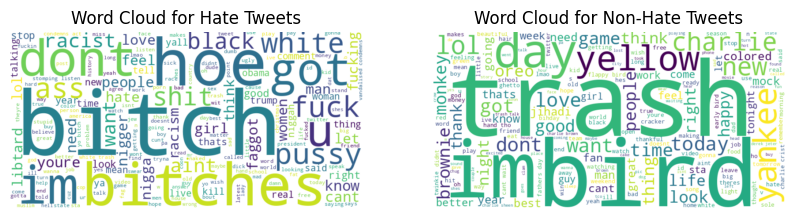

In [91]:
create_word_cloud(train_test_dataset)

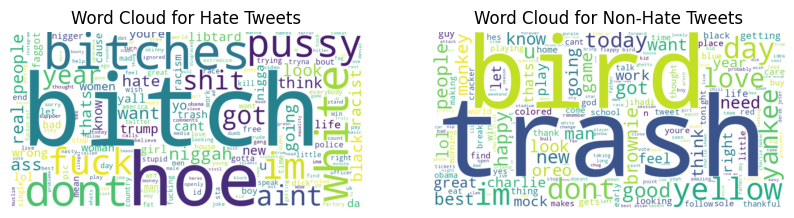

In [92]:
create_word_cloud(experiment_dataset)